<h1>Data Analytics Project</h1>

<h2> United Kingdom Road Accident Data Analysis</h2>
<h3> Inclusive years : 2019 - 2022</h3>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [32]:
accident = pd.read_csv('dataset\\accident_data.csv')

In [33]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1> Data Preparation </h1>

In [34]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [35]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [36]:
#accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [37]:
accident['Accident_Severity'].value_counts ()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h1>Converting Object to Date Time Data Type</h1>

In [38]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [39]:
accident['Accident Date']

0        2019-06-05
1        2019-07-02
2        2019-08-26
3        2019-08-16
4        2019-09-03
            ...    
660674   2022-02-18
660675   2022-02-21
660676   2022-02-23
660677   2022-02-23
660678   2022-02-28
Name: Accident Date, Length: 660679, dtype: datetime64[ns]

<h1>CLEARING NULL VALUES</h1>

In [40]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [41]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [42]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Extracting date information using pandas date time</h1>

In [43]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

<h1>ADJUSTING DATA TYPES</h1>

In [44]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

In [45]:
 accident['Accident_Severity'] = accident['Accident_Severity'].astype('category' )
 accident['Latitude'] = accident['Latitude'].astype('category' )
 accident['Light_Conditions'] = accident['Light_Conditions'].astype('category' )
 accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category' )
 accident['Road_Type'] = accident['Road_Type'].astype('category' )
 accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category' )
 accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category' )
 accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category' )

In [46]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

In [47]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


In [48]:
df_2019 = accident[accident['Year'] == 2019]
df_2022 = accident[accident['Year'] == 2022]

In [49]:
light_accidents = df_2019.groupby('Light_Conditions').size()

In [50]:
light_accidents

Light_Conditions
Darkness - lighting unknown      1768
Darkness - lights lit           35769
Darkness - lights unlit           694
Darkness - no lighting          10842
Daylight                       133042
dtype: int64

In [51]:
acc_day = df_2019.groupby(df_2019['Accident Date'].dt.day_name()).size()

In [52]:
acc_day

Accident Date
Friday       27303
Monday       20386
Saturday     29262
Sunday       24686
Thursday     27300
Tuesday      26251
Wednesday    26927
dtype: int64

<h1>Data Analytics</h1>

<h4>Analyzing Each Field from Data set</h4>

<h1>UniVariate</h1>

In [53]:
df_2019 = accident[accident['Year'] == 2019]

#df_2019
#urban, rural, severity, casualty

df_2019['Accident_Severity'].value_counts()

new_df = df_2019[df_2019['Accident_Severity'] != 'Slight']

In [54]:
visual = new_df.groupby(['Urban_or_Rural_Area', 'Accident_Severity']) ['Number_of_Casualties'].sum().reset_index()

visual

,Urban_or_Rural_Area,Accident_Severity,Number_of_Casualties
0,Rural,Fatal,3844
1,Rural,Serious,17502
2,Rural,Slight,0
3,Unallocated,Fatal,0
4,Unallocated,Serious,0
5,Unallocated,Slight,0
6,Urban,Fatal,1507
7,Urban,Serious,18594
8,Urban,Slight,0


<h3>Univariate Analysis from year 2019</h3>

<h2> Area Analysis</h2>

In [55]:
area_year = accident.groupby(['District Area', 'Year']).size().reset_index(name= 'Accident_Count')

pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')

pivot_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365.0,552.0,171.0,305.0,107.0,397.0,282.0,268.0,367.0,401.0,...,356.0,710.0,215.0,291.0,333.0,366.0,502.0,328.0,230.0,503.0
2020,513.0,691.0,164.0,299.0,105.0,321.0,282.0,288.0,356.0,338.0,...,349.0,609.0,210.0,244.0,340.0,389.0,449.0,295.0,230.0,459.0
2021,445.0,687.0,155.0,298.0,20.0,335.0,232.0,280.0,338.0,340.0,...,303.0,633.0,239.0,255.0,318.0,323.0,397.0,321.0,273.0,484.0
2022,NaN,NaN,129.0,226.0,NaN,294.0,NaN,NaN,315.0,316.0,...,302.0,514.0,194.0,218.0,311.0,283.0,381.0,294.0,236.0,451.0


<h3> Creating a line plot </h3>

<function matplotlib.pyplot.show(close=None, block=None)>

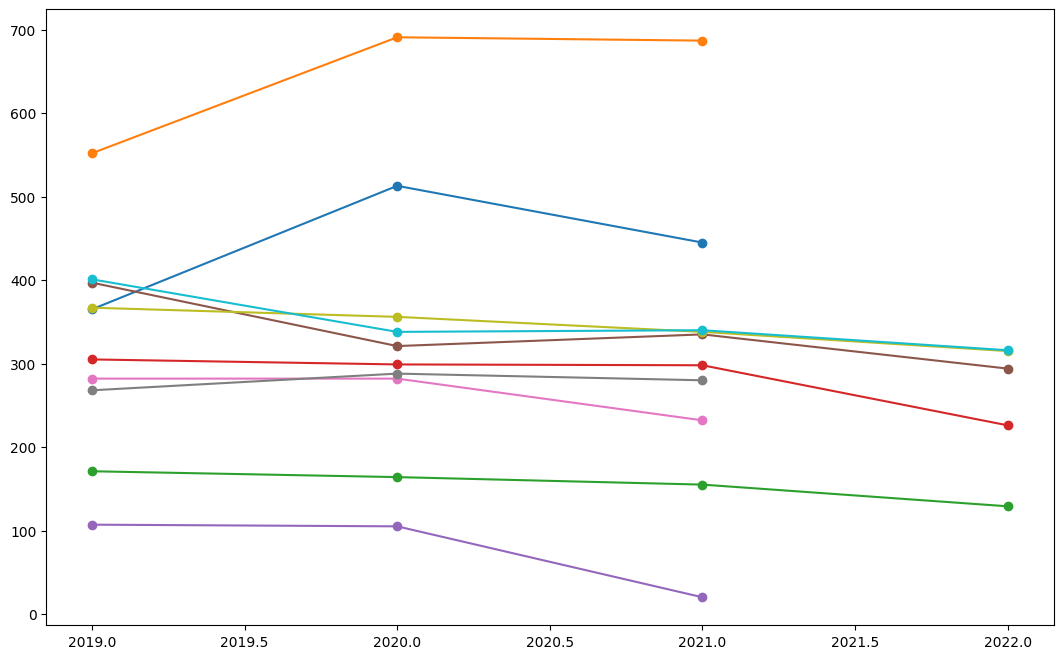

In [56]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index,pivot_table[x], label = x, marker ='o')
    if count == 10:
        break

plt.gcf().set_size_inches(13,8)
plt.legend
plt.show

<h1>Seasonal Analysis</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

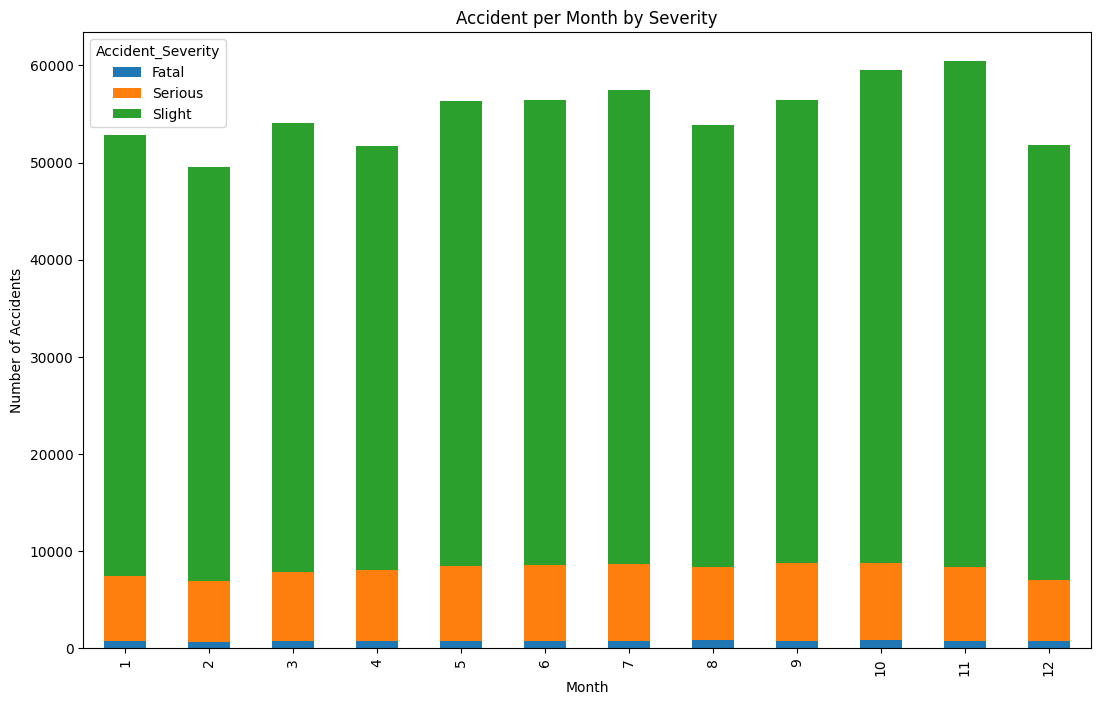

In [57]:
accident_per_month = accident.groupby(['Month', 'Accident_Severity']).size().unstack()

accident_per_month.plot(kind = 'bar', stacked = True)
plt.title('Accident per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13,8)
plt.show

<h1>Visualizing Correlation</h1>

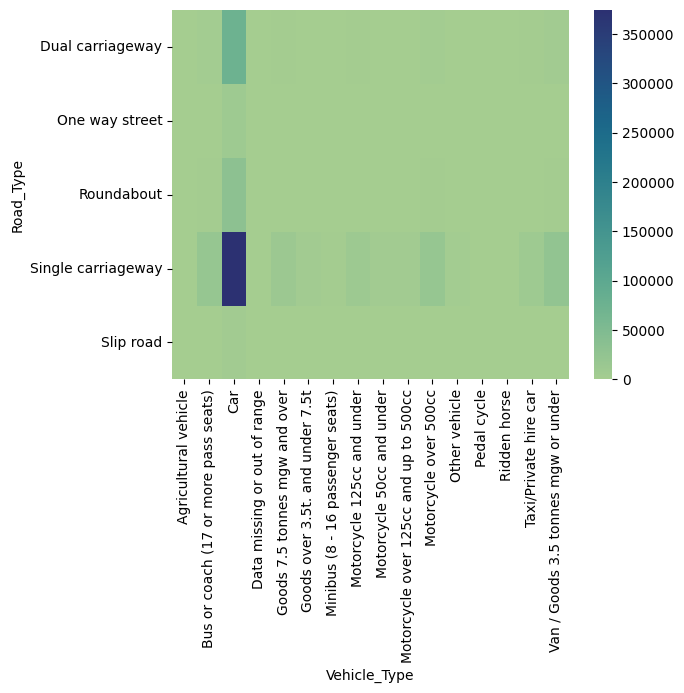

In [58]:
type_vh = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()

sns.heatmap(type_vh, cmap="crest")
plt.show() 

In [59]:
accident['Year'] = pd.to_numeric(accident['Year'], errors='coerce')
accident['Month'] = pd.to_numeric(accident['Month'], errors='coerce')

<h1>1. Monthly Trend of Accidents</h1>

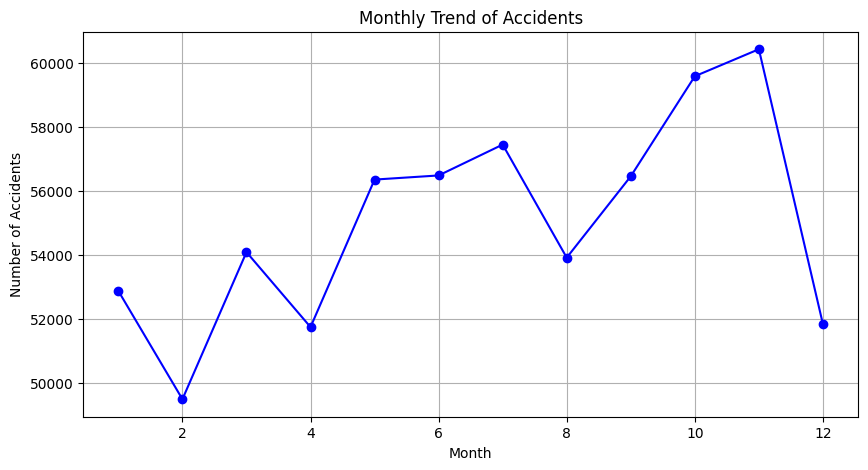

In [61]:
monthly_trend = accident.groupby("Month").size()

# Plot
plt.figure(figsize=(10,5))
monthly_trend.plot(kind="line", marker="o", color="blue", linestyle="-")
plt.title("Monthly Trend of Accidents")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.grid()
plt.show()

<h1>2. Most Dangerous Months for Severe Accidents</h1>

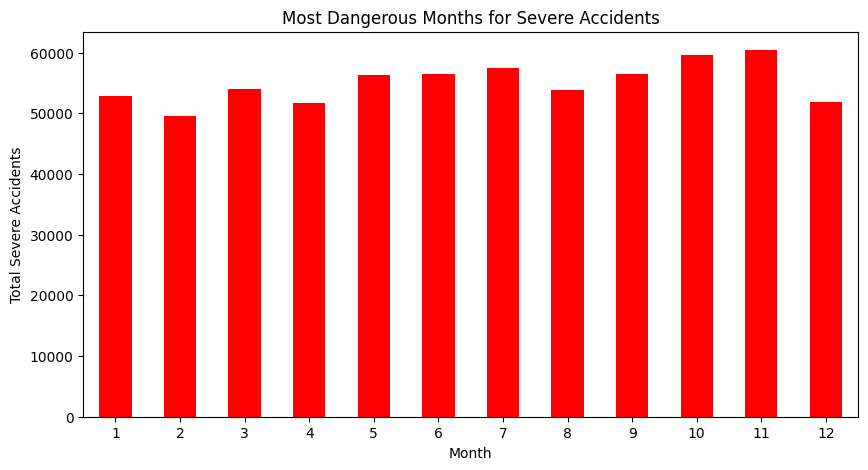

In [64]:
severity_by_month = accident.groupby("Month")["Accident_Severity"].size()

plt.figure(figsize=(10, 5))
severity_by_month.plot(kind="bar", color="red")
plt.title("Most Dangerous Months for Severe Accidents")
plt.xlabel("Month")
plt.ylabel("Total Severe Accidents")
plt.xticks(rotation=0)
plt.show()

<h1>3. Monthly trend of accidents by severity</h1>

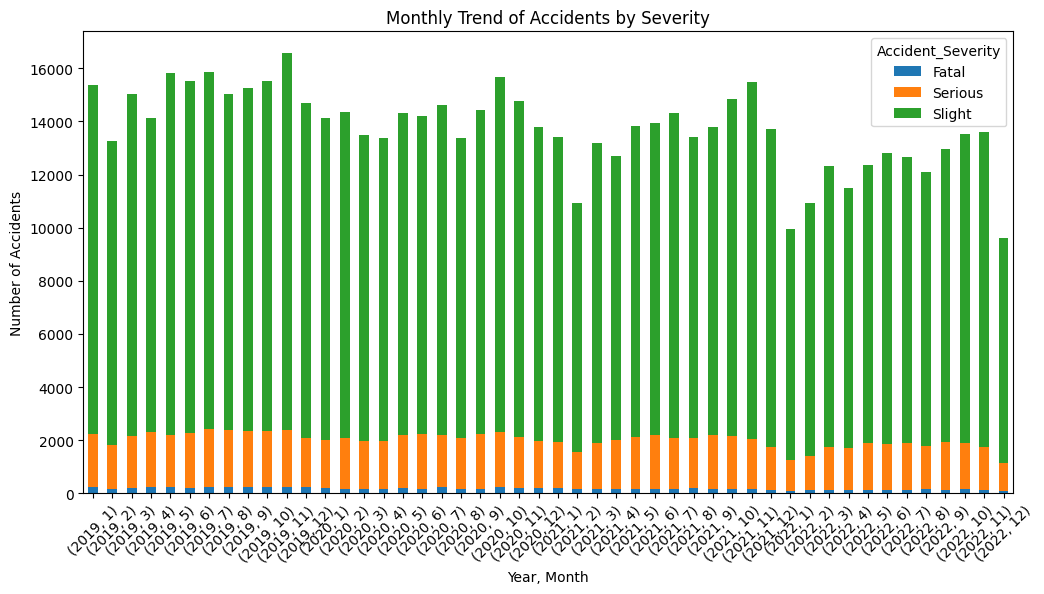

In [65]:
monthly_severity = accident.groupby(['Year', 'Month', 'Accident_Severity']).size().unstack().fillna(0)
monthly_severity.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title('Monthly Trend of Accidents by Severity')
plt.xlabel('Year, Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h1>4. Vehicle Type vs. Number of Accidents</h1>

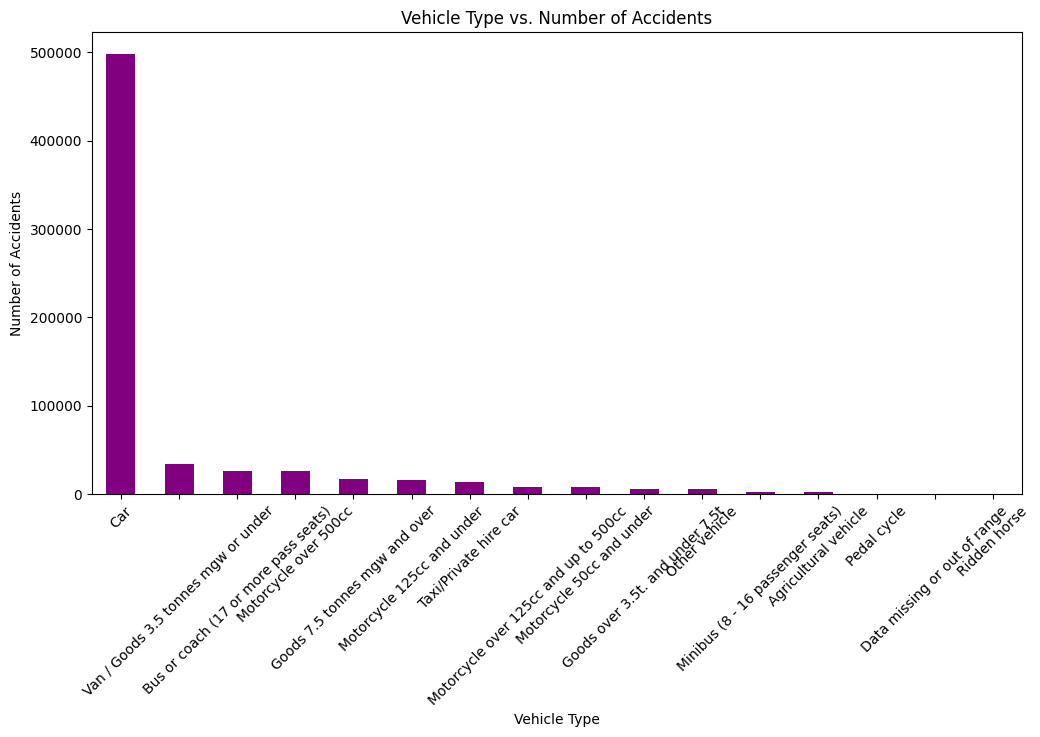

In [111]:
vehicle_accidents = accident["Vehicle_Type"].value_counts()

plt.figure(figsize=(12,6))
vehicle_accidents.plot(kind="bar", color="purple")
plt.title("Vehicle Type vs. Number of Accidents")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h1>5. Weather impact on accidents by day of the week</h1>

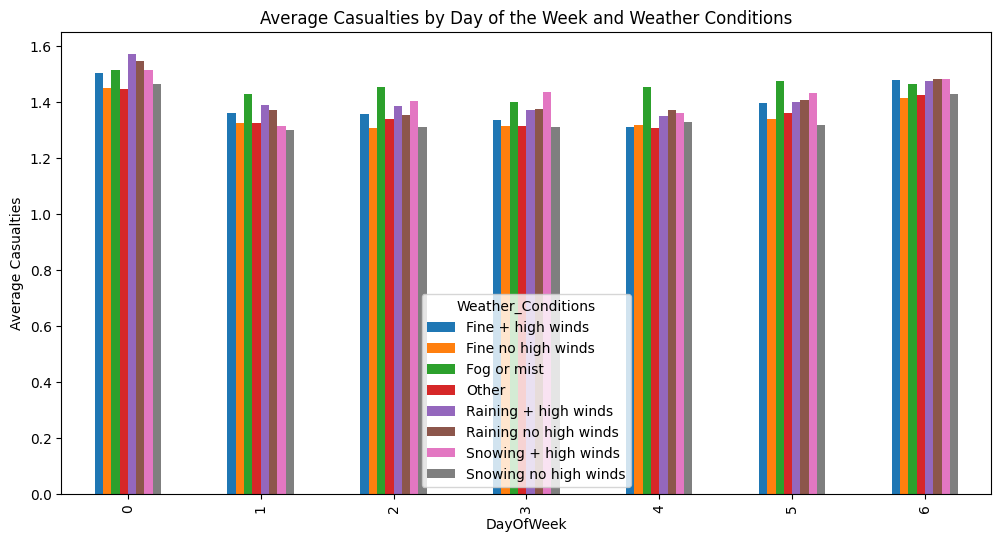

In [106]:
weather_by_day = accident.groupby(['DayOfWeek', 'Weather_Conditions'])['Number_of_Casualties'].mean().unstack()

weather_by_day.plot(kind='bar', figsize=(12,6))

plt.title('Average Casualties by Day of the Week and Weather Conditions')
plt.ylabel('Average Casualties')
plt.show()

<h1>6. Urban vs. Rural Accidents Over the Months</h1>

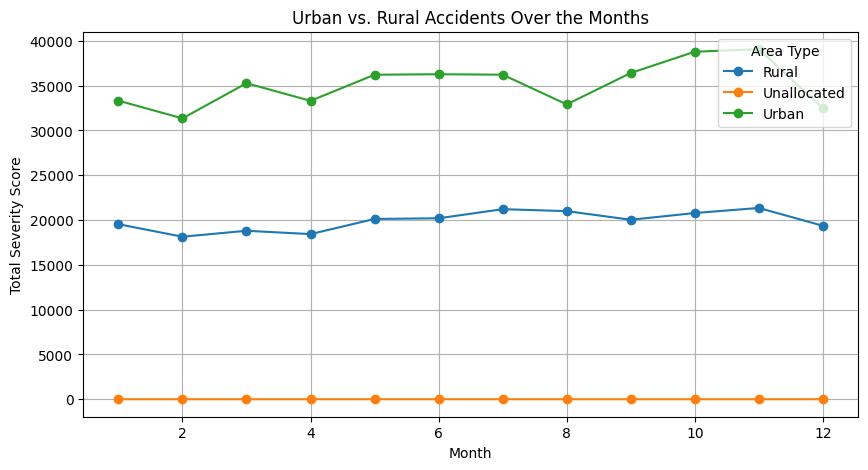

In [105]:
urban_rural = accident.groupby(["Month", "Urban_or_Rural_Area"])["Accident_Severity"].size().unstack()

urban_rural.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Urban vs. Rural Accidents Over the Months")
plt.xlabel("Month")
plt.ylabel("Total Severity Score")
plt.legend(title="Area Type")
plt.grid(True)
plt.show()

<h1>7. Road type distribution by month and severity.</h1>

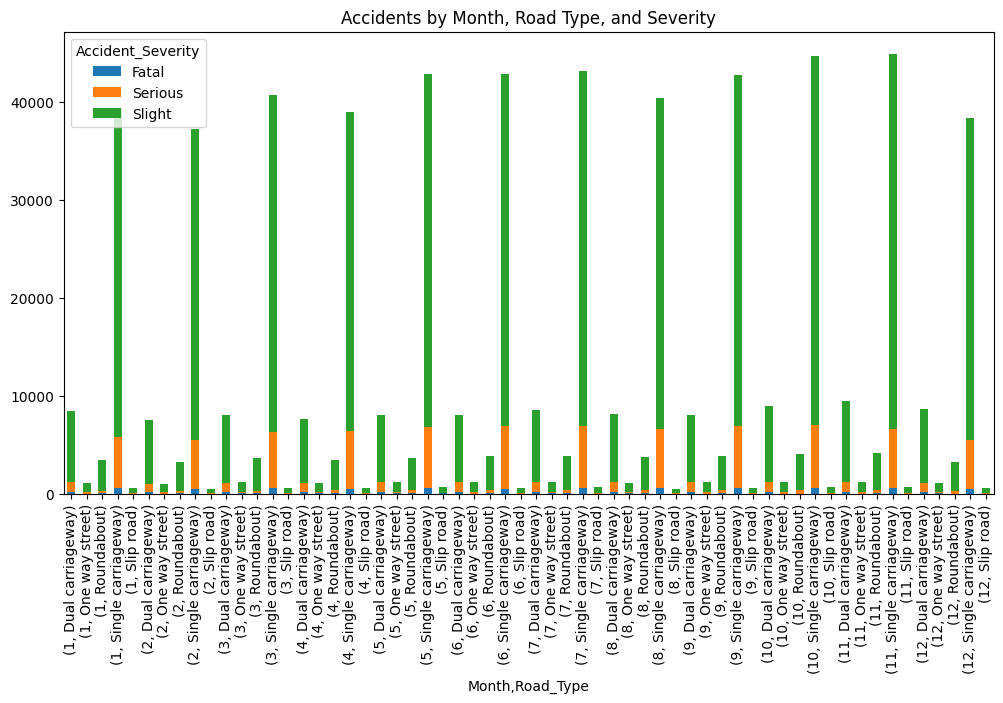

In [92]:
road_month_severity = accident.groupby(['Month', 'Road_Type', 'Accident_Severity']).size().unstack().fillna(0)
road_month_severity.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title('Accidents by Month, Road Type, and Severity')
plt.show()

<h1>8. Seasonal impact on accident severity.</h1>

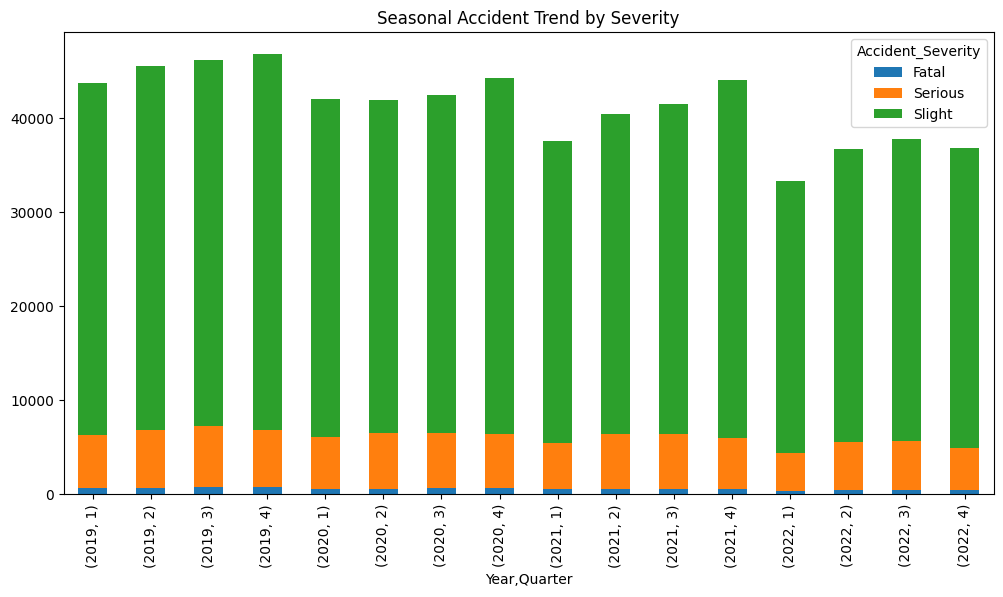

In [91]:
accident['Quarter'] = accident['Month'].apply(lambda x: (x-1)//3 + 1)
seasonal_severity = accident.groupby(['Year', 'Quarter', 'Accident_Severity']).size().unstack().fillna(0)

seasonal_severity.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title('Seasonal Accident Trend by Severity')
plt.show()

<h1>9. Most dangerous weather by month</h1>

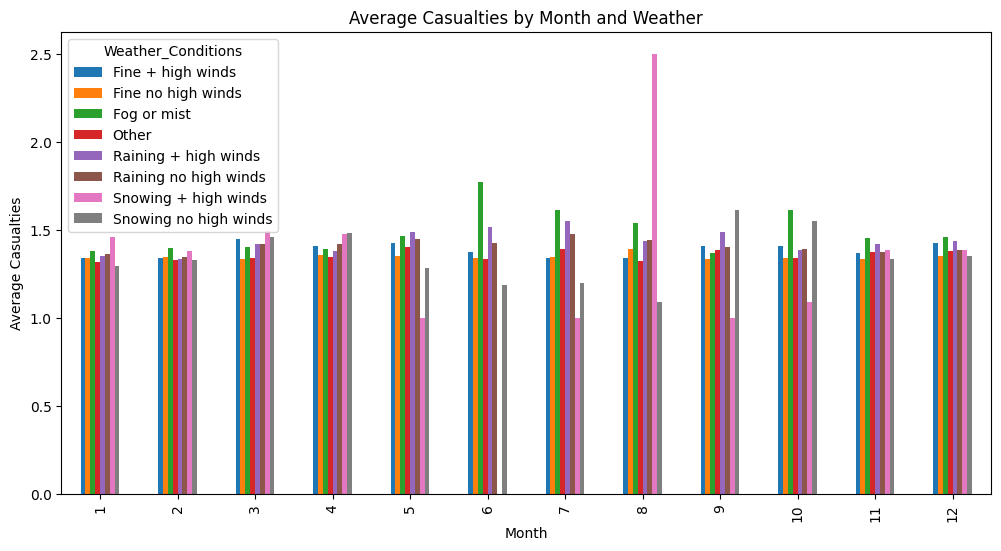

In [90]:
weather_month = accident.groupby(['Month', 'Weather_Conditions'])['Number_of_Casualties'].mean().unstack()

weather_month.plot(kind='bar', figsize=(12,6))

plt.title('Average Casualties by Month and Weather')
plt.ylabel('Average Casualties')
plt.show()

<h1>10. Light conditions by day of the week and severity</h1>

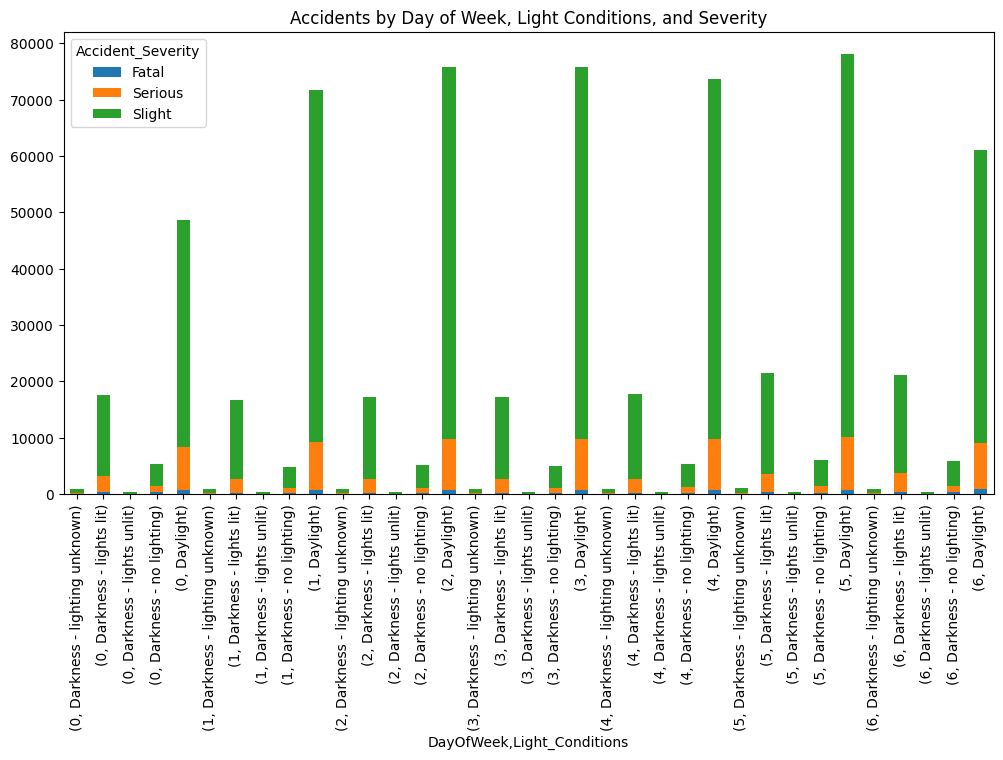

In [89]:
light_day_severity = accident.groupby(['DayOfWeek', 'Light_Conditions', 'Accident_Severity']).size().unstack().fillna(0)

light_day_severity.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Accidents by Day of Week, Light Conditions, and Severity')
plt.show()

<h1>11. Number of vehicles involved by month and road type</h1>

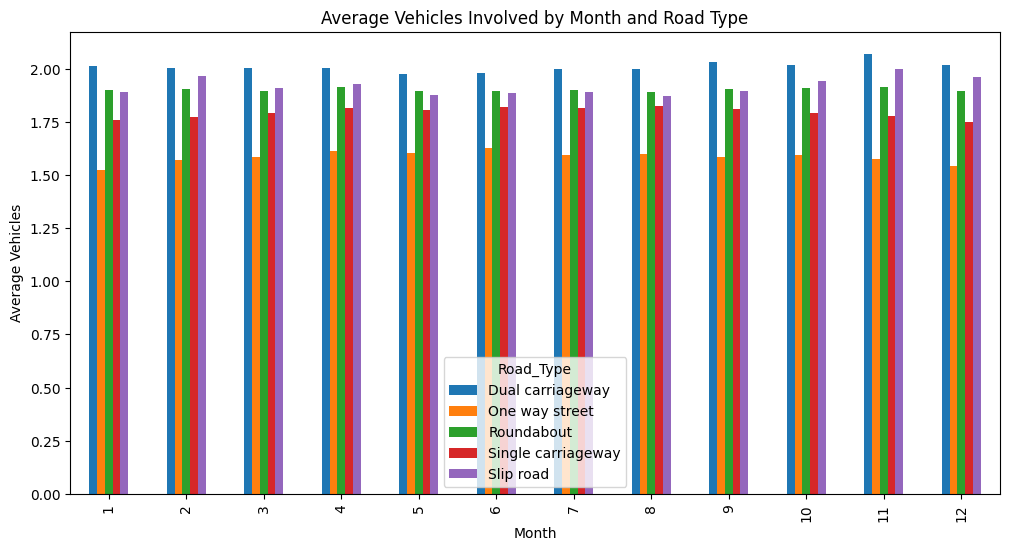

In [88]:
vehicles_month_road = accident.groupby(['Month', 'Road_Type'])['Number_of_Vehicles'].mean().unstack()
vehicles_month_road.plot(kind='bar', figsize=(12,6))

plt.title('Average Vehicles Involved by Month and Road Type')
plt.ylabel('Average Vehicles')
plt.show()

<h1>12.  Number of Accidents per Month</h1>

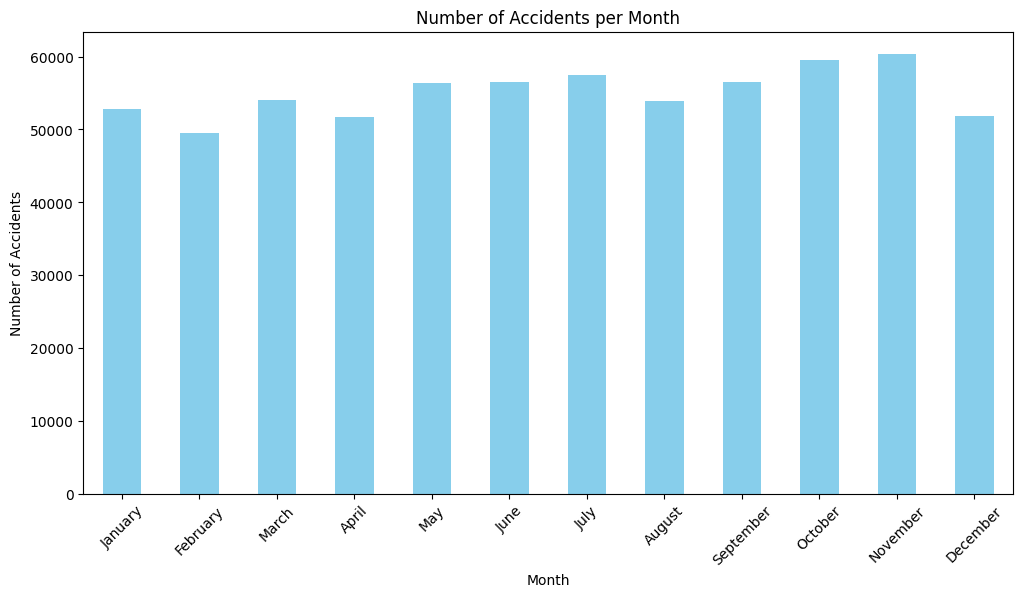

In [87]:
#data
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

# Count accidents per month
month_accidents = accident.groupby("Month").size()
month_accidents.index = month_accidents.index.map(month_names)  # Convert to month names

# Plot
plt.figure(figsize=(12,6))
month_accidents.plot(kind="bar", color="skyblue")
plt.title("Number of Accidents per Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h1>13. Urban vs Rural accident trend by month</h1>

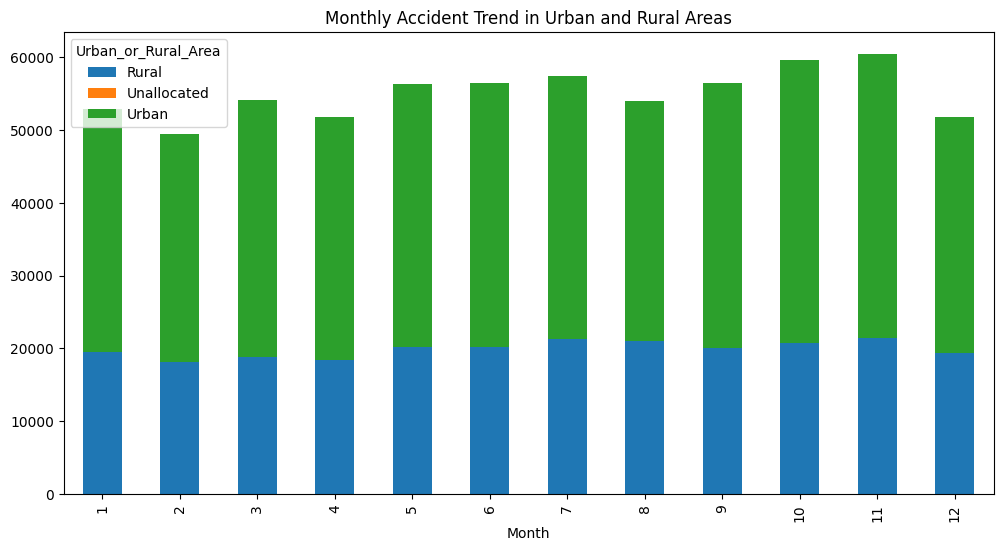

In [86]:
urban_rural_month = accident.groupby(['Month', 'Urban_or_Rural_Area']).size().unstack().fillna(0)
urban_rural_month.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title('Monthly Accident Trend in Urban and Rural Areas')
plt.show()


<h1>14. Top vehicle types by day of the week</h1>

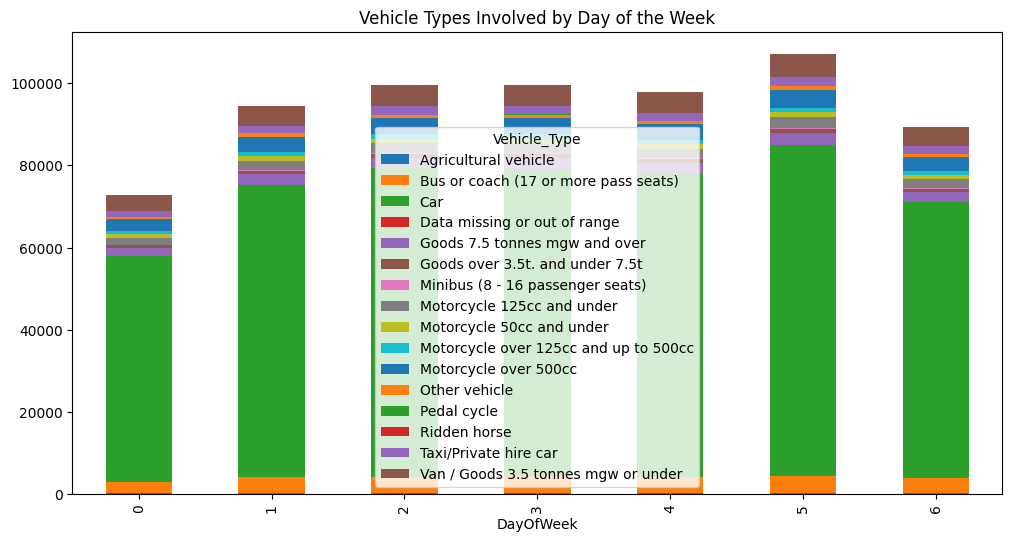

In [85]:
top_vehicle_day = accident.groupby(['DayOfWeek', 'Vehicle_Type']).size().unstack(fill_value=0)
top_vehicle_day.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title('Vehicle Types Involved by Day of the Week')
plt.show()

<h1>15. Relationship Between Number of Vehicles and Casualties</h1>

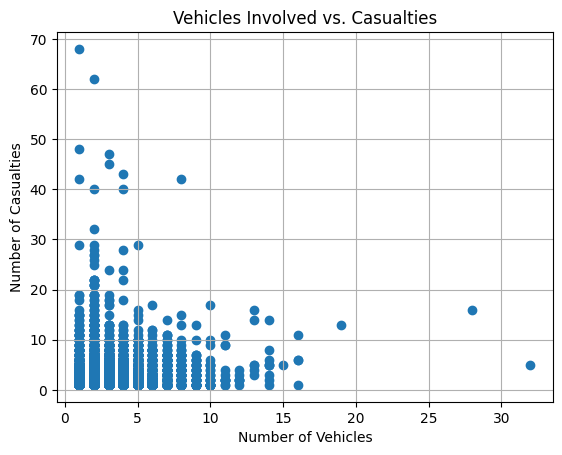

In [84]:
plt.scatter(accident["Number_of_Vehicles"], accident["Number_of_Casualties"])

plt.title("Vehicles Involved vs. Casualties")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.grid(True)
plt.show()

<h1>16. Number of Casualties vs. Road Type</h1>

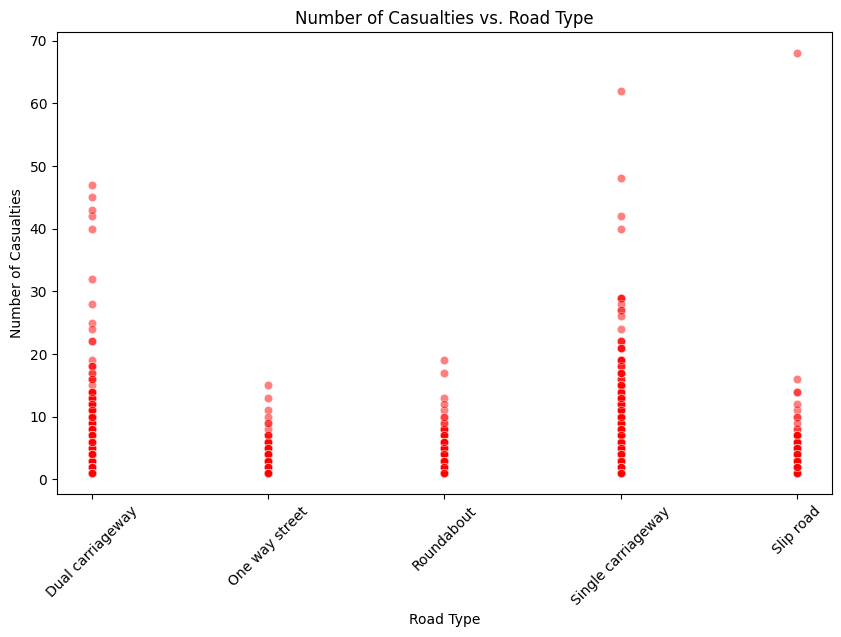

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=accident, x="Road_Type", y="Number_of_Casualties", alpha=0.5, color="red")
plt.title("Number of Casualties vs. Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Casualties")
plt.xticks(rotation=45)
plt.show()

<h1>17. Road surface impact by day of the week </h1>

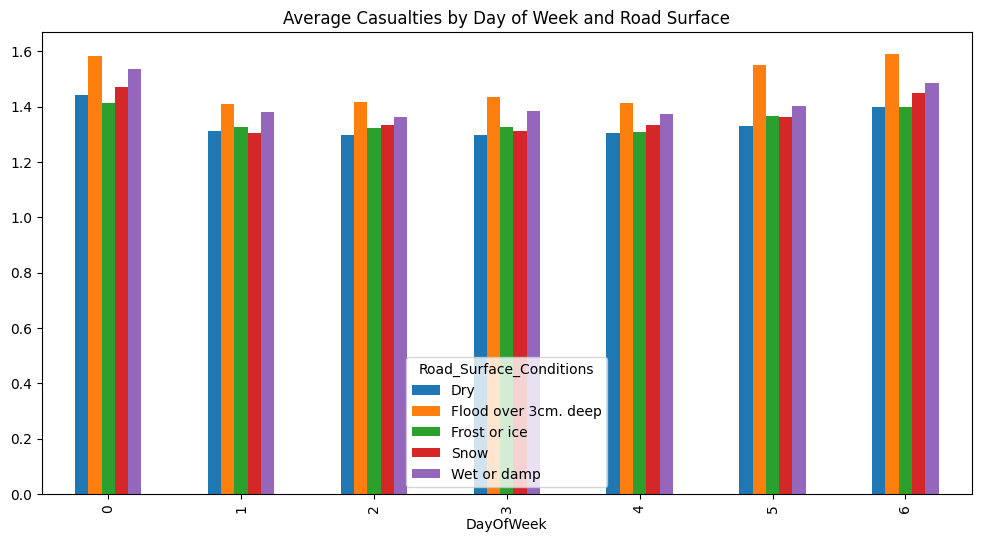

In [77]:
surface_day_casualties = accident.groupby(['DayOfWeek', 'Road_Surface_Conditions'])['Number_of_Casualties'].mean().unstack()
surface_day_casualties.plot(kind='bar', figsize=(12,6))

plt.title('Average Casualties by Day of Week and Road Surface')
plt.show()


<h1>18. Vehicle type distribution across seasons</h1>

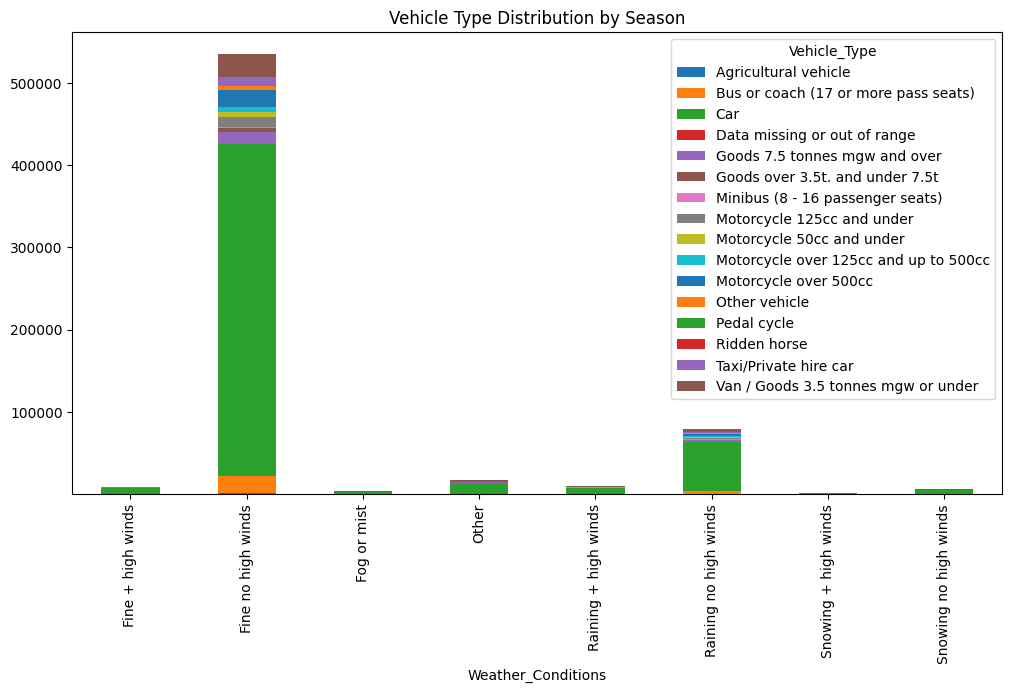

In [76]:
vehicle_seasonal = accident.groupby(['Weather_Conditions', 'Vehicle_Type']).size().unstack().fillna(0)
vehicle_seasonal.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title('Vehicle Type Distribution by Season')
plt.show()

<h1>19. Accident Severity by Day of the Week</h1>

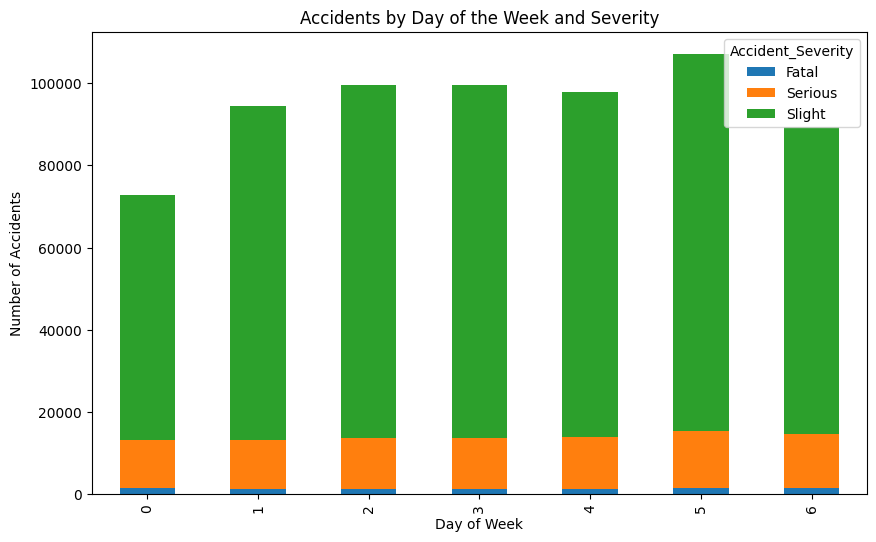

In [73]:
day_severity = accident.groupby(['DayOfWeek', 'Accident_Severity']).size().unstack().fillna(0)
day_severity.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Accidents by Day of the Week and Severity')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

<h1>20. Casualty rate by day of the week and urban/rural</h1>

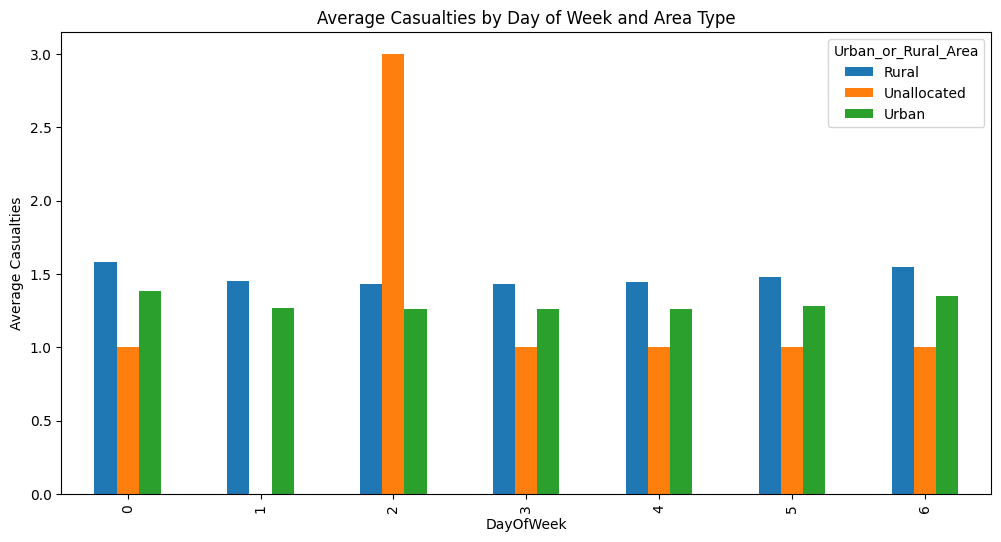

In [72]:
casualties_day_area = accident.groupby(['DayOfWeek', 'Urban_or_Rural_Area'])['Number_of_Casualties'].mean().unstack()
casualties_day_area.plot(kind='bar', figsize=(12,6))

plt.title('Average Casualties by Day of Week and Area Type')
plt.ylabel('Average Casualties')
plt.show()

<h1>21. Road Type and Number of Casualties</h1>

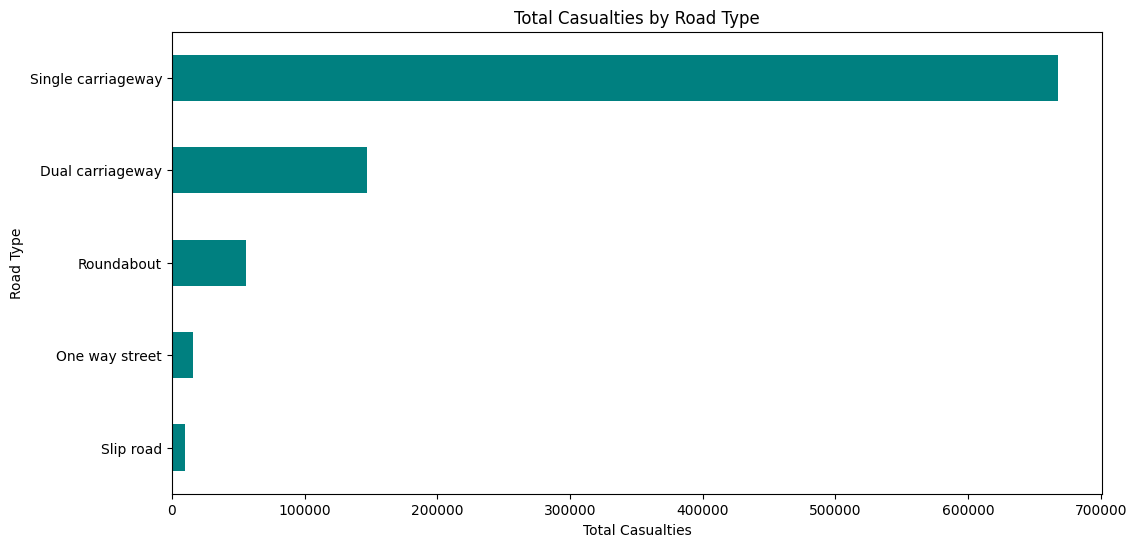

In [71]:
casualties_by_road = accident.groupby("Road_Type")["Number_of_Casualties"].sum().sort_values()

plt.figure(figsize=(12, 6))
casualties_by_road.plot(kind="barh", color="teal")
plt.title("Total Casualties by Road Type")
plt.xlabel("Total Casualties")
plt.ylabel("Road Type")
plt.show()

<h1>22. Time Trend of Accidents per Month</h1>

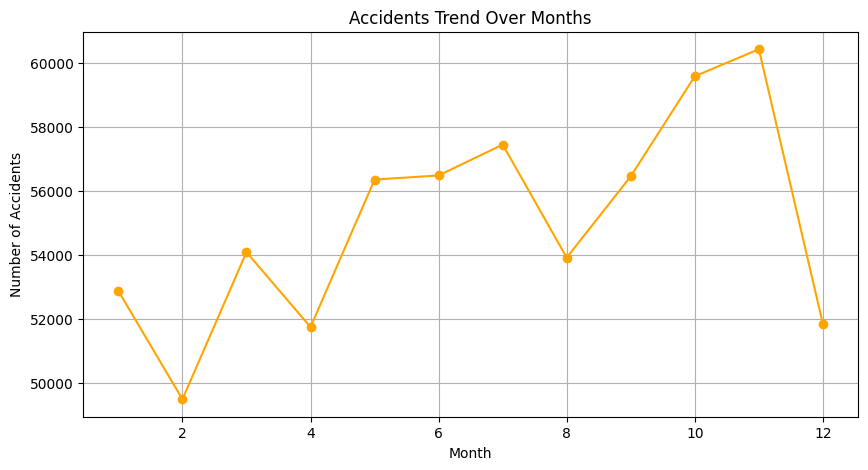

In [70]:
accidents_per_month = accident.groupby("Month")["Accident Date"].count()

plt.figure(figsize=(10, 5))
plt.plot(accidents_per_month.index, accidents_per_month.values, marker="o", linestyle="-", color="orange")
plt.title("Accidents Trend Over Months")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

<h1>23. Top 5 Districts with Most Accidents</h1>

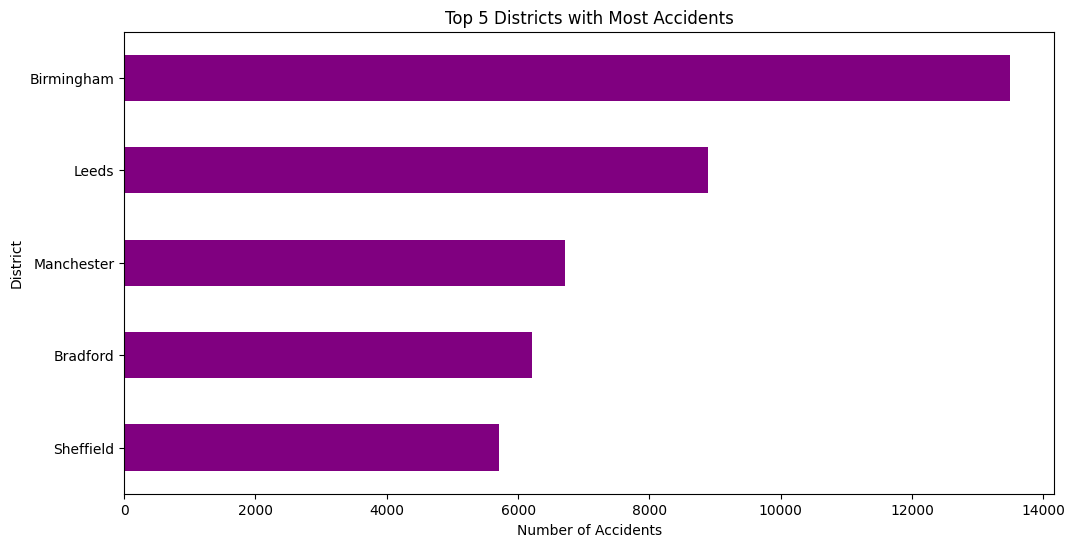

In [69]:
top_districts = accident["District Area"].value_counts().nlargest(5)

plt.figure(figsize=(12,6))
top_districts.plot(kind="barh", color="purple")
plt.title("Top 5 Districts with Most Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("District")
plt.gca().invert_yaxis()
plt.show()

<h1>24. Impact of Light Conditions on Accident Severity </h1>

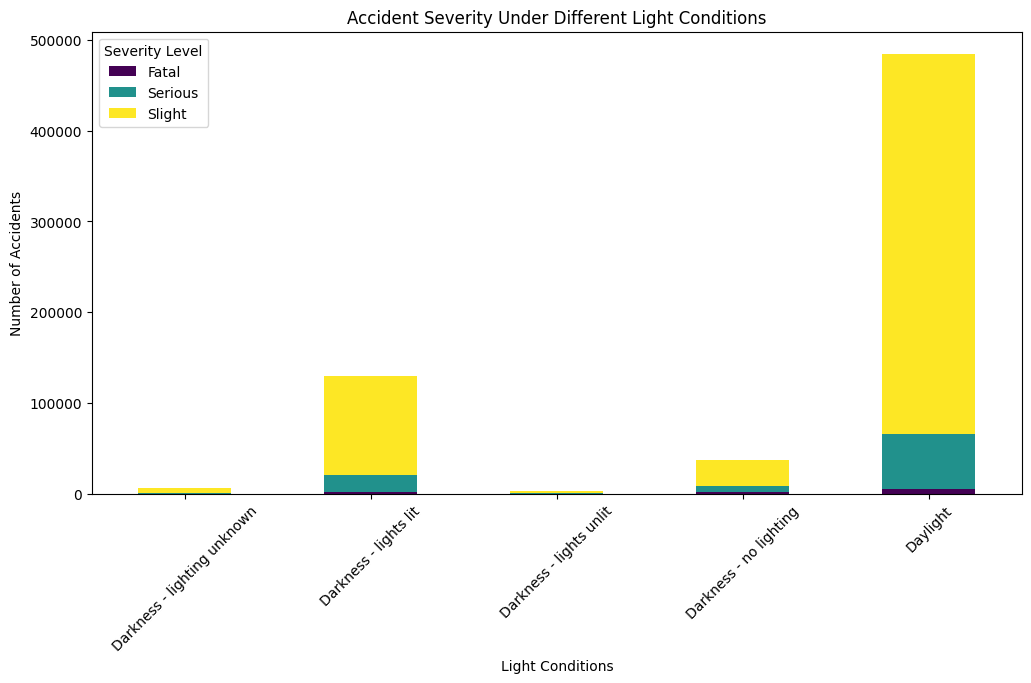

In [68]:
light_severity = accident.groupby(["Light_Conditions", "Accident_Severity"]).size().unstack().fillna(0)

light_severity.plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")
plt.title("Accident Severity Under Different Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(title="Severity Level")
plt.show()

<h1>25. Monthly Accidents for Each Severity Level</h1>

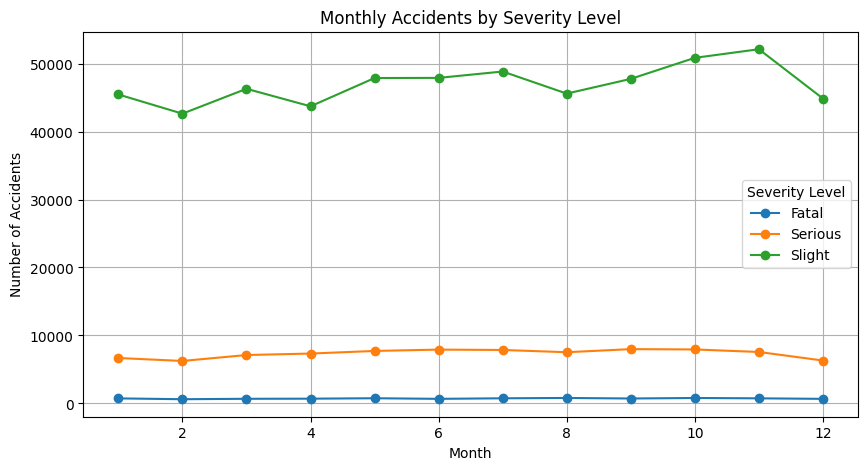

In [67]:
severity_by_month = accident.groupby(["Month", "Accident_Severity"]).size().unstack().fillna(0)

severity_by_month.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Monthly Accidents by Severity Level")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.legend(title="Severity Level")
plt.grid(True)
plt.show()